#Model CNN Standar (1.0)



*   Nama : Tri Amin Ridho
*   NIM : 2018230108
*   Tanggal : 20 Desember 2022
*   Tentang : Kesegaran daging sapi
*   Ket : Skripsi (Tugas Akhir)

Mempunyai dataset sekitar 1080 gambar.dibagi menjadi 90% Training dan 10% Testing

##Library

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

##Melihat list package

In [2]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

##Menghubungkan dengan Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Membuat lokasi file

In [ ]:
Lokasi = '/content/gdrive/MyDrive/Dataset_CNN/'

##Melihat isi dataset

In [ ]:
os.listdir('/content/gdrive/MyDrive/Dataset_CNN/')

['train', 'test', 'test2']

In [ ]:
# Melihat isi dari folder train
os.listdir(Lokasi + '/train')

['setengahSegar', 'Segar', 'Busuk']

##Melihat isi banyaknya data setiap klasifikasi

In [ ]:
print('Jumlah Train Segar    :', len(os.listdir(Lokasi + '/train/Segar')))
print('Jumlah Test Segar     :', len(os.listdir(Lokasi + '/test/Segar')))

Jumlah Train Segar    : 324
Jumlah Test Segar     : 36


In [ ]:
print('Jumlah Train Setengah Segar    :', len(os.listdir(Lokasi + '/train/setengahSegar')))
print('Jumlah Test Setengah Segar     :', len(os.listdir(Lokasi + '/test/setengahSegar')))

Jumlah Train Setengah Segar    : 324
Jumlah Test Setengah Segar     : 36


In [ ]:
print('Jumlah Train Busuk    :', len(os.listdir(Lokasi + '/train/Busuk')))
print('Jumlah Test Busuk     :', len(os.listdir(Lokasi + '/test/Busuk')))

Jumlah Train Busuk    : 324
Jumlah Test Busuk     : 36


##Image Acquistion

In [ ]:
# Melihat data train setiap klasifikasi
kelas = []
n_gambar = []
data = {'KualitasDaging':[], 'JumlahFoto':[]}

for i in os.listdir(Lokasi + '/train'):
  n_gambar.append(len(os.listdir(Lokasi + '/train/' + i)))
  kelas.append(i)

data['KualitasDaging'] += kelas
data['JumlahFoto'] += n_gambar

df = pd.DataFrame(data)
df

,KualitasDaging,JumlahFoto
0,setengahSegar,324
1,Segar,324
2,Busuk,324


Dari kualitasDaging terdapat list klasifikasi

contoh:
1. [0] sebagai setengahSegar
2. [1] sebagai Segar
3. [2] sebagai Busuk

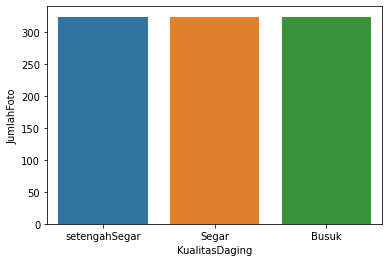

In [ ]:
# Menampilkan Hasil Grafik
sns.barplot(x=df['KualitasDaging'], y=df['JumlahFoto'])

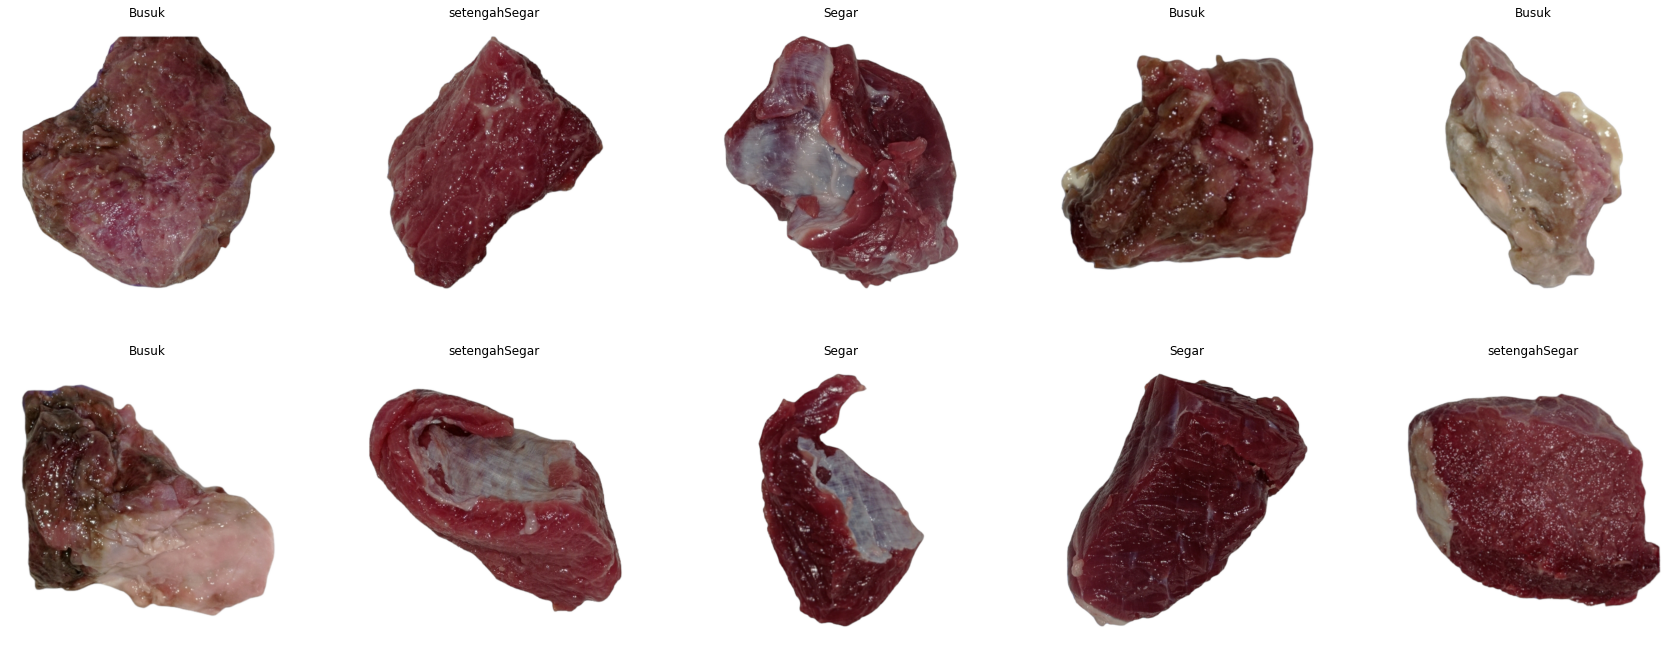

In [ ]:
# Melihat gambar setiap klasifikasi
KualitasDaging = os.listdir(Lokasi + '/train')

plt.figure(figsize = (30, 30)) # ukuran gambar 30 x 30 piksel
# Pengulangan untuk menampilkan hasil gambar daging sapi
for x in range(10):
  i = random.randint(0, 2) # Mengambil gambar dari folder
  NamaKelas = os.listdir(Lokasi + 'train' + '/' + KualitasDaging[i])

  j = random.randint(0, 100)
  gambar = cv2.imread(Lokasi + '/train' + '/' + KualitasDaging[i] + '/' + NamaKelas[j])
  gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
  ax = plt.subplot(5, 5, x+1)
  plt.imshow(gambar)
  plt.title(KualitasDaging[i])
  plt.axis("off")

plt.show()

##Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  horizontal_flip = True,
                  vertical_flip = True,
                  zoom_range = 0.2,
                  rotation_range = 30,
                  validation_split = 0.2)

In [ ]:
image_dir = Lokasi + '/train'

train_generator = image_datagen.flow_from_directory(image_dir,
                                                    subset = 'training',
                                                    target_size = (512, 512),
                                                    batch_size = 10)

val_generator = image_datagen.flow_from_directory(image_dir,
                                                subset = 'validation',
                                                target_size = (512, 512),
                                                batch_size = 10)

Found 780 images belonging to 3 classes.
Found 192 images belonging to 3 classes.


##Modeling CNN Standar (1.0)

In [ ]:
# Membangun model dengan CNN Standar
ModelCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = tf.nn.relu, input_shape = (512, 512, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.BatchNormalization(),

          tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu),
          tf.keras.layers.MaxPooling2D(2, 2),

          tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
          tf.keras.layers.MaxPooling2D(2, 2),

          tf.keras.layers.Conv2D(256, (3,3), activation =  tf.nn.relu),
          tf.keras.layers.MaxPooling2D(2, 2),

          tf.keras.layers.Conv2D(512, (3,3), activation =  tf.nn.relu),
          tf.keras.layers.MaxPooling2D(2, 2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation=tf.nn.relu),
          tf.keras.layers.Dense(256, activation=tf.nn.relu),
          tf.keras.layers.Dense(128, activation=tf.nn.relu),
          tf.keras.layers.Dense(64, activation=tf.nn.relu),
          tf.keras.layers.Dense(3, activation = tf.nn.softmax, name="classification")
])

In [ ]:
# Melihat Model InceptionV3
ModelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 255, 255, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                        

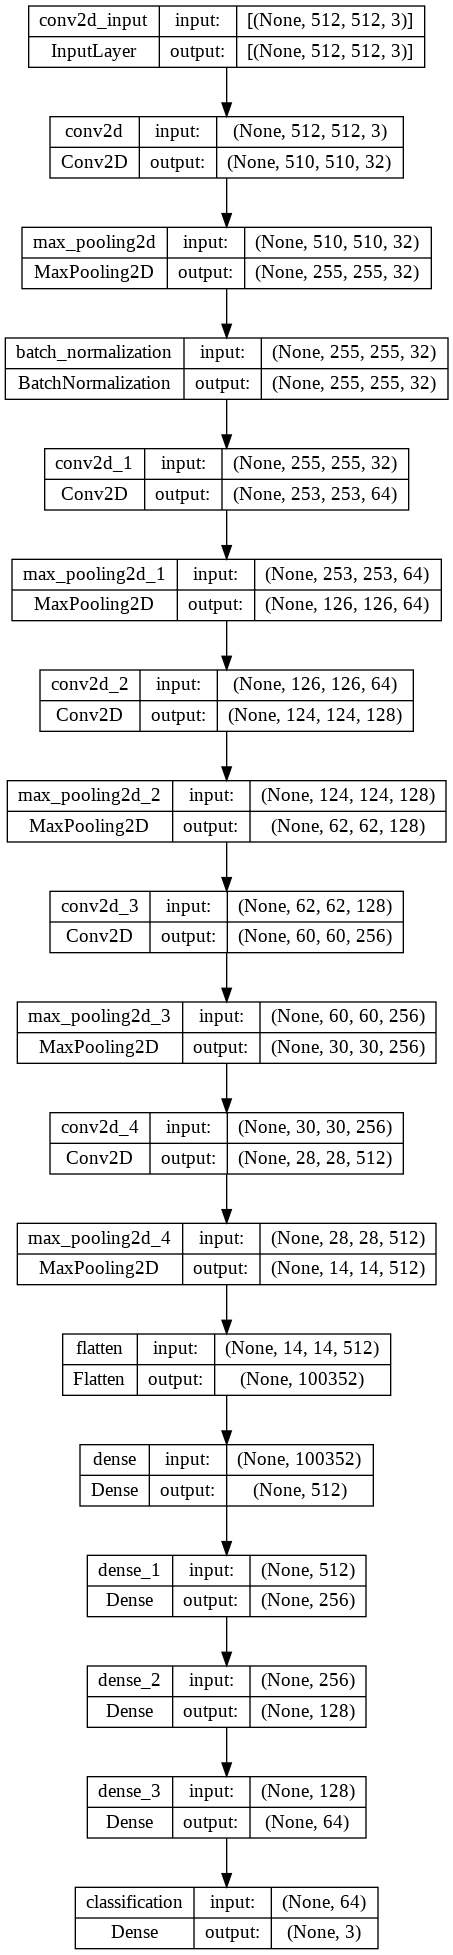

In [ ]:
tf.keras.utils.plot_model(ModelCNN, show_shapes=True)

In [ ]:
# melakukan optimizer dengan SGD
ModelCNN.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, 
                                                        momentum=0.9),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Melakukan Callback sebelum training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
CegahUnderOrOver = EarlyStopping(monitor='val_accuracy',
                                patience=10,
                                min_delta=0.001,
                                mode='max',
                                restore_best_weights=True
                                )

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reducelr = ReduceLROnPlateau(monitor='val_accuracy',
                            factor=0.3,
                            patience=8,
                            min_lr=0.001,
                            mode='auto',
                            verbose=1)

##Melakukan Training

In [ ]:
history = ModelCNN.fit(
            train_generator,
            epochs = 20,
            validation_data = val_generator,
            callbacks=[CegahUnderOrOver, reducelr]
)

Epoch 1/20
78/78 [==============================] - 90s 1s/step - loss: 1.0986 - accuracy: 0.3462 - val_loss: 1.0984 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 2/20
78/78 [==============================] - 74s 955ms/step - loss: 1.0897 - accuracy: 0.3397 - val_loss: 1.0950 - val_accuracy: 0.4010 - lr: 1.0000e-04
Epoch 3/20
78/78 [==============================] - 74s 950ms/step - loss: 1.0811 - accuracy: 0.3603 - val_loss: 1.0943 - val_accuracy: 0.4427 - lr: 1.0000e-04
Epoch 4/20
78/78 [==============================] - 79s 1s/step - loss: 1.0659 - accuracy: 0.4474 - val_loss: 1.0870 - val_accuracy: 0.4323 - lr: 1.0000e-04
Epoch 5/20
78/78 [==============================] - 72s 921ms/step - loss: 1.0410 - accuracy: 0.4718 - val_loss: 1.0668 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 6/20
78/78 [==============================] - 72s 918ms/step - loss: 0.9799 - accuracy: 0.5744 - val_loss: 1.0280 - val_accuracy: 0.4635 - lr: 1.0000e-04
Epoch 7/20
78/78 [============================

20/20 [==============================] - 20s 1s/step - loss: 0.2882 - accuracy: 0.8698


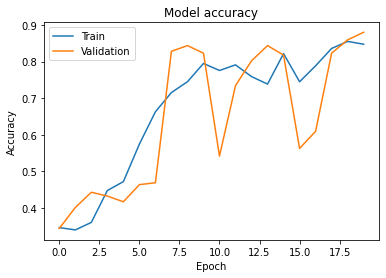

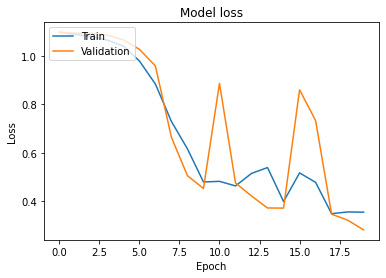

In [ ]:
ModelCNN.evaluate(val_generator)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Evaluasi Data Testing

###Membuat Jalur dan CSV data testing

In [ ]:
sub_test ='/content/gdrive/MyDrive/CSV/SubTest.csv' #data csv kosong
path_test = '/content/gdrive/MyDrive/Dataset_CNN/test2' #jalur ke data testing

###Menampilkan isi data csv

In [ ]:
# Menampilkan isi data csv
df_sub = pd.read_csv(sub_test)
image_id = df_sub['Nama_File'] #membuat variabel image_id
df_sub.head(10)

,Nama_File,Label
0,busukTest1,0
1,busukTest2,0
2,busukTest3,0
3,busukTest4,0
4,busukTest5,0
5,busukTest6,0
6,busukTest7,0
7,busukTest8,0
8,busukTest9,0
9,busukTest10,0


###Melakukan Prediksi dengan Data Testing

In [ ]:
# Masing-masing gambar akan diperlakukan secara individual dan disimpan dalam daftar yang kemudian bergabung dengan ID file tersebut

from tensorflow.keras.preprocessing.image import load_img


# membuat daftar yg diprediksi
labels = []


for i in image_id:
    image = load_img('/content/gdrive/MyDrive/Dataset_CNN/test2/'+str(i)+'.png', target_size=(512, 512))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,512,512,3)
    label = ModelCNN.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))

1/1 [==============================] - 0s 20ms/step


In [ ]:
df_sub['Label'] = labels #Membuat variabel labels
df_sub.head(10)

,Nama_File,Label
0,busukTest1,0
1,busukTest2,0
2,busukTest3,0
3,busukTest4,0
4,busukTest5,2
5,busukTest6,0
6,busukTest7,0
7,busukTest8,0
8,busukTest9,0
9,busukTest10,0


###Hasil Prediksi dengan Data Testing

In [ ]:
df_prediksi_test = pd.DataFrame({'Nama_File':image_id,
                                 'prediksi':labels})
df_prediksi_test

,Nama_File,prediksi
0,busukTest1,0
1,busukTest2,0
2,busukTest3,0
3,busukTest4,0
4,busukTest5,2
...,...,...
103,setengahSegarTest32,2
104,setengahSegarTest33,2
105,setengahSegarTest34,2
106,setengahSegarTest35,2


###Menganti Nilai dengan Klasifikasi Hasil Testing

In [ ]:
df_prediksi_test.replace(to_replace=[0, 1, 2], value=["Busuk", "Segar","setengahSegar"], inplace=True)

In [ ]:
df_prediksi_test

,Nama_File,prediksi
0,busukTest1,Busuk
1,busukTest2,Busuk
2,busukTest3,Busuk
3,busukTest4,Busuk
4,busukTest5,setengahSegar
...,...,...
103,setengahSegarTest32,setengahSegar
104,setengahSegarTest33,setengahSegar
105,setengahSegarTest34,setengahSegar
106,setengahSegarTest35,setengahSegar


###Menyimpan CSV Data Prediksi

In [ ]:
df_prediksi_test.to_csv("/content/gdrive/MyDrive/CSV/DataPrediksiTest1.0_CNN.csv", index=False)

###Menghubungkan Data Prediksi dan Data Aktual 

In [ ]:
ds_aktual = pd.read_csv("/content/gdrive/MyDrive/CSV/DataAktual.csv")
ds_predict = pd.read_csv("/content/gdrive/MyDrive/CSV/DataPrediksiTest1.0_CNN.csv")

In [ ]:
ds_aktual.rename(columns={'prediksi':'label'}, inplace=True)

In [ ]:
ds_aktual

,Nama_File,Aktual
0,busukTest1,Busuk
1,busukTest2,Busuk
2,busukTest3,Busuk
3,busukTest4,Busuk
4,busukTest5,Busuk
...,...,...
103,setengahSegarTest32,setengahSegar
104,setengahSegarTest33,setengahSegar
105,setengahSegarTest34,setengahSegar
106,setengahSegarTest35,setengahSegar


In [ ]:
ds_predict

,Nama_File,prediksi
0,busukTest1,Busuk
1,busukTest2,Busuk
2,busukTest3,Busuk
3,busukTest4,Busuk
4,busukTest5,setengahSegar
...,...,...
103,setengahSegarTest32,setengahSegar
104,setengahSegarTest33,setengahSegar
105,setengahSegarTest34,setengahSegar
106,setengahSegarTest35,setengahSegar


###Mengabungkan File CSV Data Prediksi dan Aktual Serta Hasilnya

In [ ]:
df_test_eval = pd.merge(
    ds_predict,
    ds_aktual,
    how="inner",
    on='Nama_File')

In [ ]:
df_test_eval.head(108)

,Nama_File,prediksi,Aktual
0,busukTest1,Busuk,Busuk
1,busukTest2,Busuk,Busuk
2,busukTest3,Busuk,Busuk
3,busukTest4,Busuk,Busuk
4,busukTest5,setengahSegar,Busuk
...,...,...,...
103,setengahSegarTest32,setengahSegar,setengahSegar
104,setengahSegarTest33,setengahSegar,setengahSegar
105,setengahSegarTest34,setengahSegar,setengahSegar
106,setengahSegarTest35,setengahSegar,setengahSegar


###Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_actual = df_test_eval['Aktual']
y_pred = df_test_eval['prediksi']
confusion_matrix(y_actual, y_pred)

array([[31,  0,  5],
       [ 0, 36,  0],
       [ 0,  5, 31]])

###Nilai Akurasi, Precision, Recall dan F1-Score

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_pred))

               precision    recall  f1-score   support

        Busuk       1.00      0.86      0.93        36
        Segar       0.88      1.00      0.94        36
setengahSegar       0.86      0.86      0.86        36

     accuracy                           0.91       108
    macro avg       0.91      0.91      0.91       108
 weighted avg       0.91      0.91      0.91       108



##Menyimpan Model

In [ ]:
ModelCNN.save("/content/gdrive/MyDrive/Model_Best/CNN_1.0-best.h5")

##Mengconvert Model h5 ke tflite
###Mengload Model H5

In [4]:
modelkeras = tf.keras.models.load_model('/content/gdrive/MyDrive/Model_Best/CNN_1.0-best.h5')

###Mengconvert model tflite

In [5]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelkeras)
tflite_model = converter.convert()
open("/content/gdrive/MyDrive/Model_Best/CNN_1.0-best.tflite", "wb").write(tflite_model)

212495328

###Check Input Tensor Shape

In [7]:
TF_LITE_MODEL_FILE_NAME = "/content/gdrive/MyDrive/Model_Best/CNN_1.0-best.tflite"

In [8]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])
     

Input Shape: [  1 512 512   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 3]
Output Type: <class 'numpy.float32'>
